In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
plt.style.use("ggplot")

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Load and inspect the data
data = pd.read_csv('C:/Sophia/School!!!/2023 Spring 1/DS take home/1.conversion/conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


A few things we need to do before we dive into predictions:

 * check for missing values
 * check for abnormal values
 * looking at numerical value correlations

In [5]:
# check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
# check for abnormal values
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
# Remove outliers
# 'age' column has max=123, which are obvious abnormal. so we need to handle those outliers
data[data['age'] > 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [8]:
data = data.loc[data.age < 100,]
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [9]:
# looking at numerical value correlations
corr_matrix = data.corr()
corr_matrix

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


Exploratory Data Analysis

   country  converted
0    China   0.001332
1  Germany   0.062428
2       UK   0.052612
3       US   0.037801


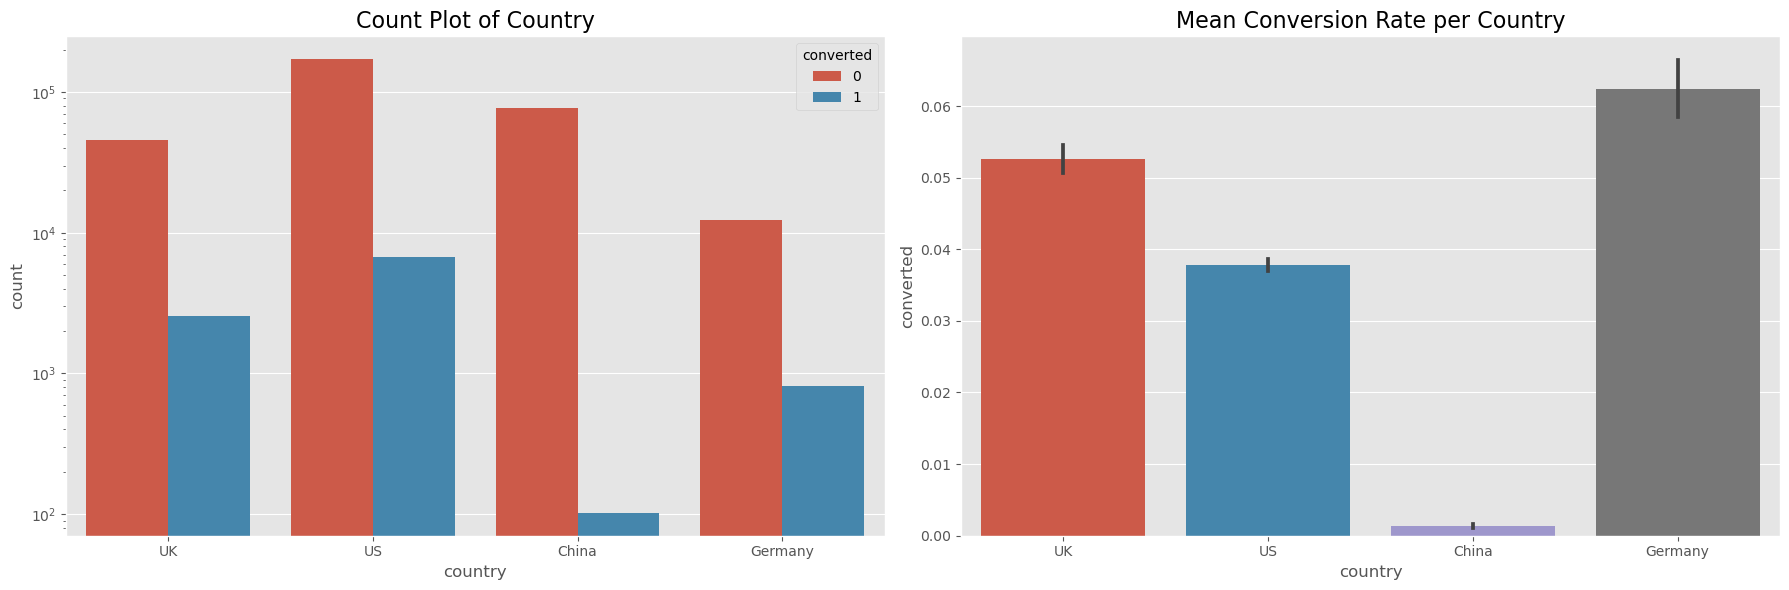

In [10]:
# Visualization of different countries
data_country = data[['country','converted']].groupby('country').mean().reset_index()
print(data_country)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='country', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)

plt.tight_layout()
plt.show()

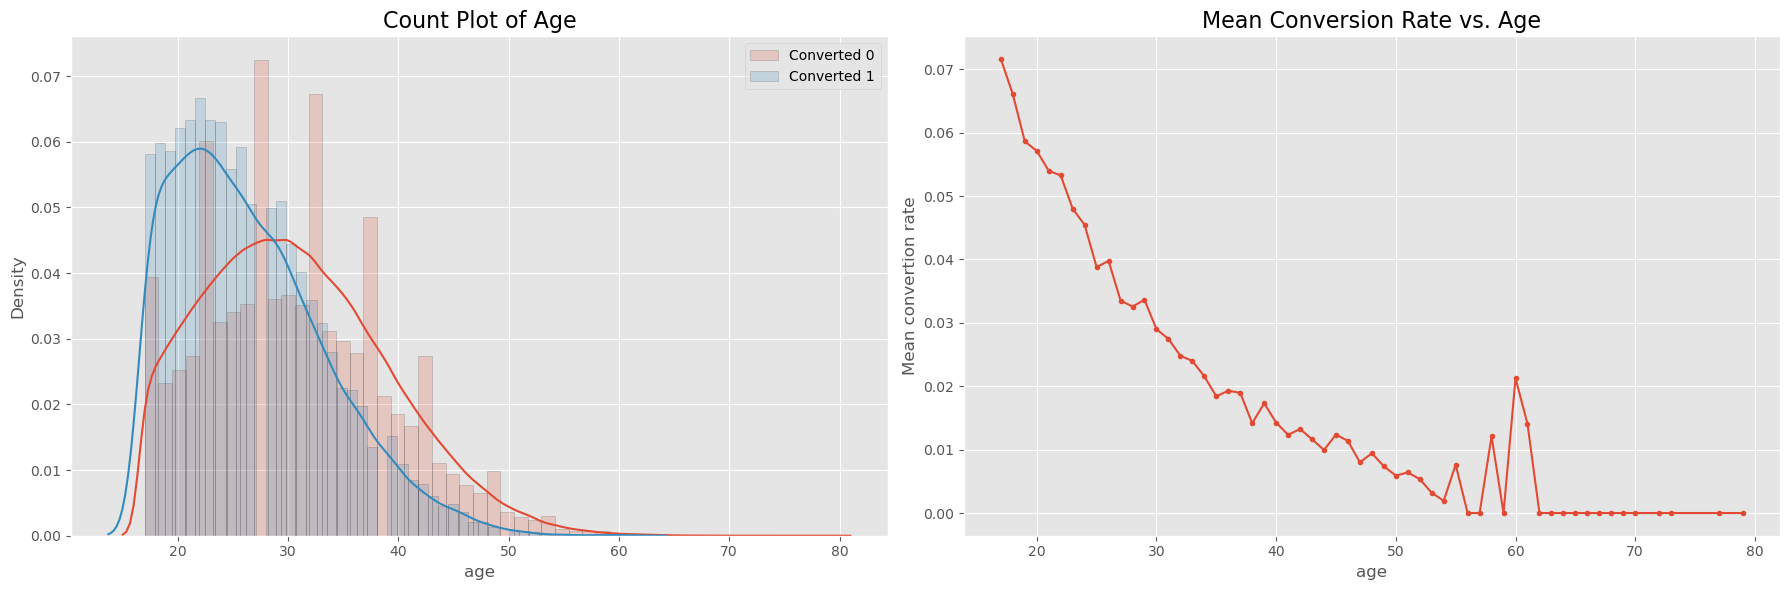

In [11]:
# Visualization of different ages
data_age = data[['age', 'converted']].groupby('age').mean().reset_index()
# print(data_age)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()

ax[1].plot(data_age['age'], data_age['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

plt.tight_layout()
plt.show()

   new_user  converted
0         0   0.071983
1         1   0.014021


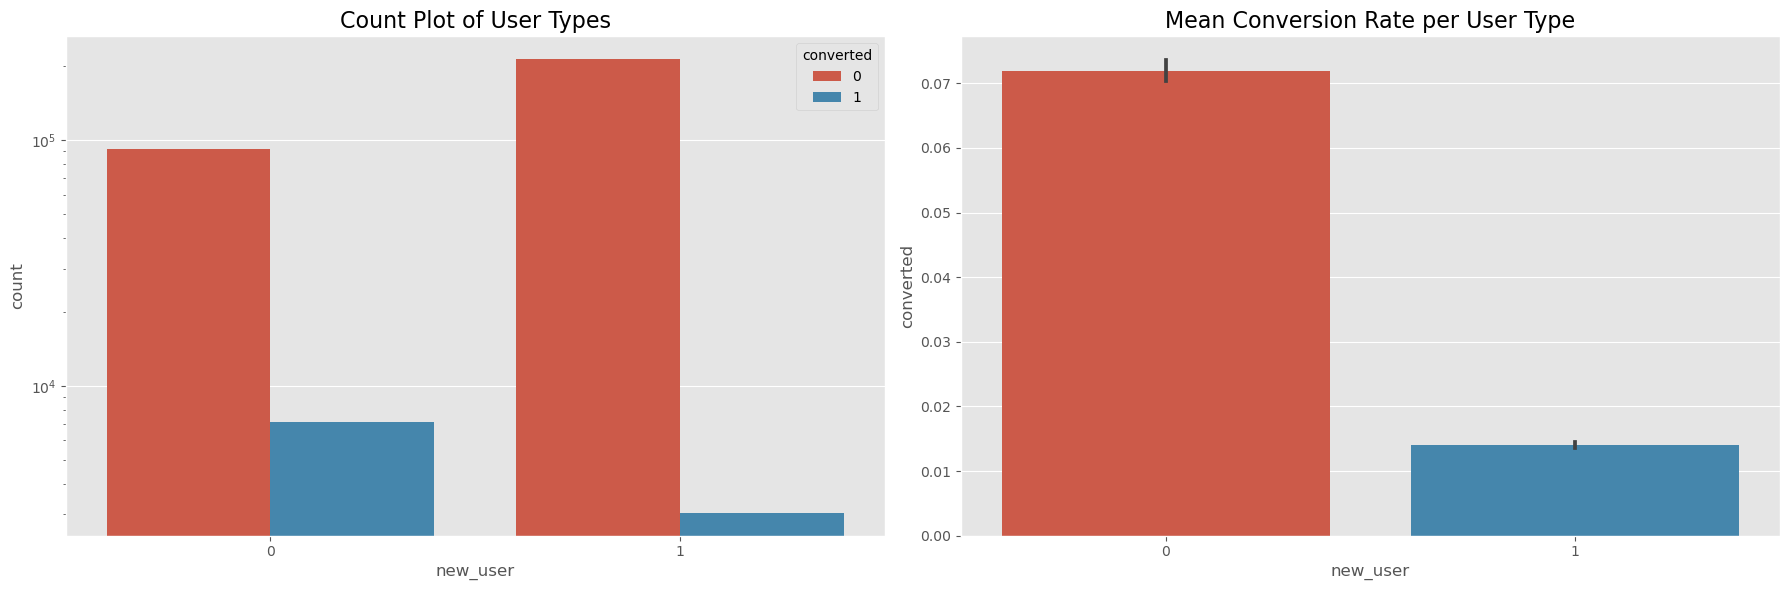

In [12]:
# Visualization of different user types
data_user = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()
print(data_user)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='new_user', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)

plt.tight_layout()
plt.show()

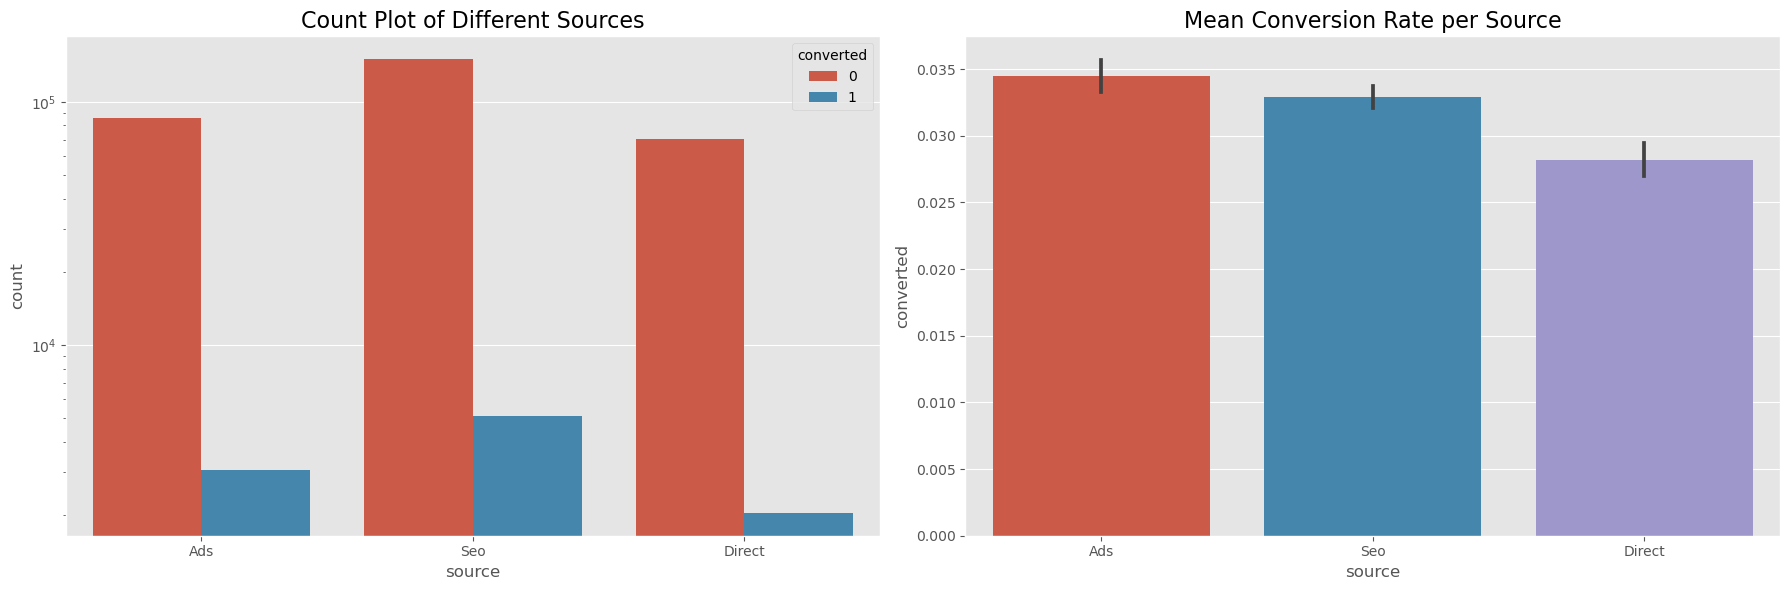

In [13]:
# Visualization of different sources
data_source = data[['source', 'converted']].groupby('source').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='source', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)

plt.tight_layout()
plt.show()

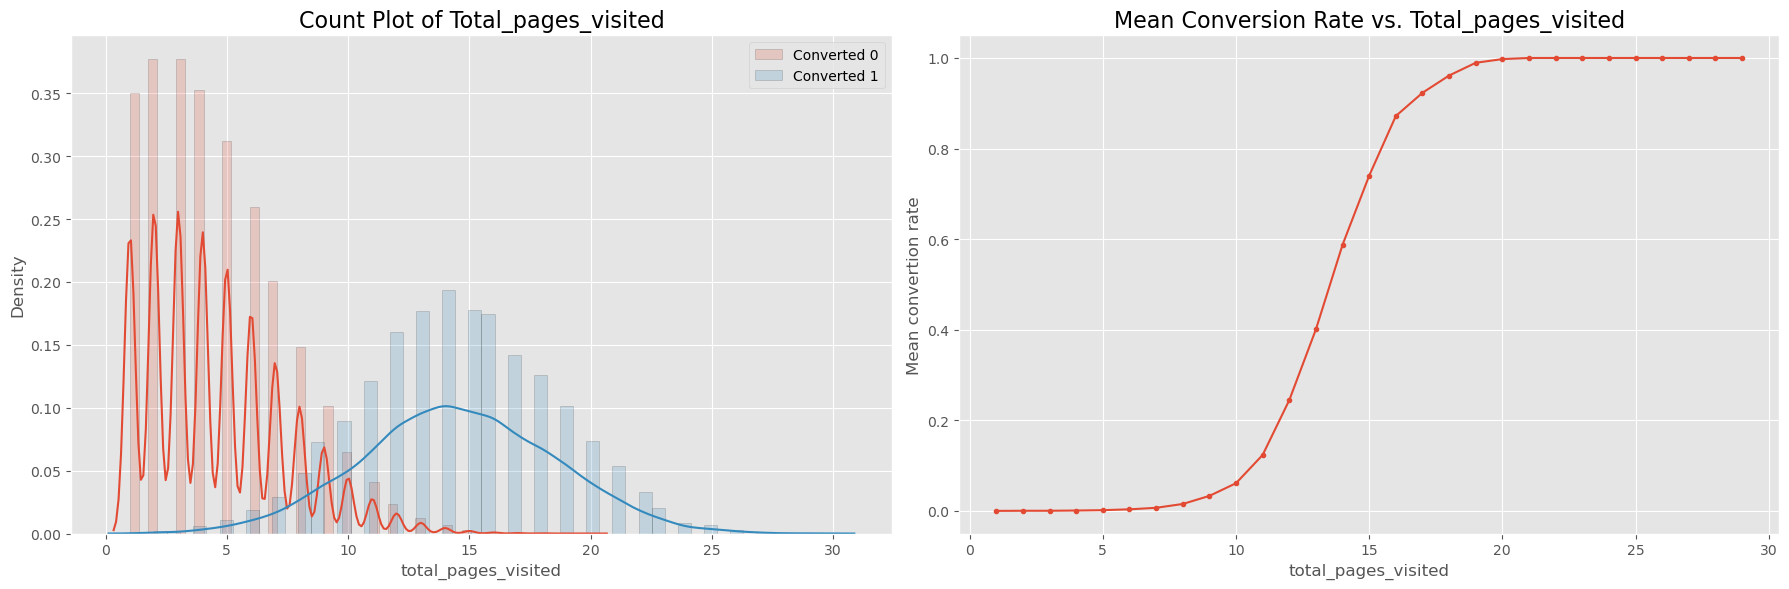

In [14]:
# Visualization of different total_pages_visited
data_total_pages_visited = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
# print(data_total_pages_visited)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.distplot(data[data['converted'] == 0]['total_pages_visited'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Total_pages_visited', fontsize=16)
ax[0].legend()

ax[1].plot(data_total_pages_visited['total_pages_visited'], data_total_pages_visited['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

plt.tight_layout()
plt.show()

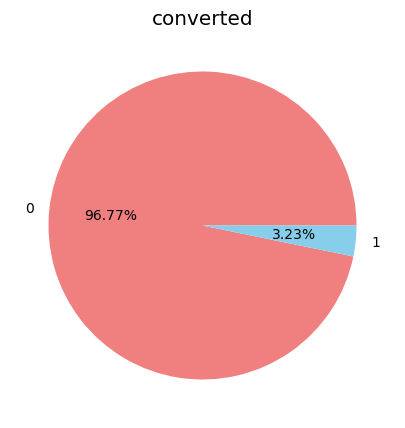

In [15]:
data['converted'].value_counts()

plt.figure(figsize=(10,5))
data['converted'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%')
plt.title('converted')
plt.ylabel('')
plt.show()

0.03191498974419214 0.0330381615011596


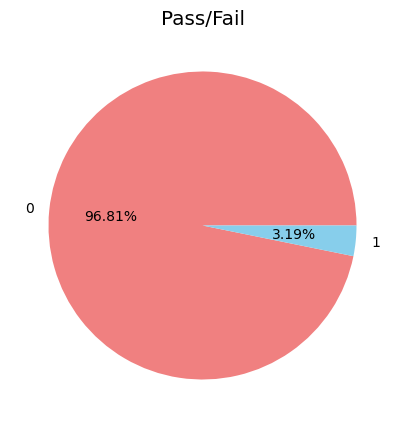

In [16]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

X = data.loc[:, ('country', 'age', 'new_user', 'source', 'total_pages_visited')]

# Convert categorical variables country and source into dummies
X = pd.get_dummies(X)

y = data.loc[:, ('converted')]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
print(y_train.mean(), y_test.mean())

plt.figure(figsize=(10,5))
y_train.value_counts().plot(kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title('Pass/Fail')
plt.ylabel('')
plt.show()

Machine Learning

In [17]:
# Logistic regression

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train_std, y_train)

LogisticRegression()

In [18]:
# Create predicted values for the test set
from sklearn.metrics import confusion_matrix, classification_report
y_pred = LogReg.predict(X_test)
# Confusion matrix: tells us Type I and Type II errors. 
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[87428,  4298],
       [  382,  2752]], dtype=int64)

In [19]:
# Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     91726
           1       0.39      0.88      0.54      3134

    accuracy                           0.95     94860
   macro avg       0.69      0.92      0.76     94860
weighted avg       0.98      0.95      0.96     94860



In [20]:
LogReg.score(X_test, y_test)

0.9506641366223909

In [21]:
LogReg.score(X_train, y_train)

0.9498007572129503

In [22]:
1 - y_test.mean()

0.9669618384988404

In [23]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Create predicted values for the test set
from sklearn.metrics import confusion_matrix, classification_report
y_pred = LogReg.predict(X_test)
# Confusion matrix: tells us Type I and Type II errors. 
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[91387,   339],
       [ 1028,  2106]], dtype=int64)

In [25]:
# Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91726
           1       0.86      0.67      0.75      3134

    accuracy                           0.99     94860
   macro avg       0.93      0.83      0.87     94860
weighted avg       0.98      0.99      0.98     94860



From above, we know for "label=converted", if we use the default cutoff 0.5, we can have a high precision (0.86), but a not very good recall 0.67, which means we classify 33% converted user as non-converted.

Since our task is giving Sales team and Marking team some insights, so we don't need to tune the cutoff value now, since that won't affect the model. 
However, if, for example, if we care more about not losing a valued customer, so incorrectly classifing a converted user as non-converted will pay much, we need to lower down the cut-off probability to be closed to 1, which will increase the recall with the price lower than precision.

In [26]:
LogReg.score(X_test, y_test)

0.9855892894792325

In [27]:
LogReg.score(X_train, y_train)

0.9864144430689714

In [28]:
1 - y_test.mean()

0.9669618384988404

Since this is an imbalanced classification problem, if we treat every record as 'NOT Converted', we can still get 96.69% accuracy (1-ytest.mean()). 
Since our LR model produces an accuracy as 98.60% on test dataset, we can say that it is a suitable model.

Feature Importances

In [29]:
LogReg.coef_[0]

array([-0.07550269, -1.75141177,  0.76132982, -3.85444115, -0.07678689,
       -0.25352701, -0.60369991, -1.52024378, -1.73431409, -1.53389708])

In [30]:
feat_importances = pd.DataFrame({"name":X_train.columns,"coef":LogReg.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-3.854441,3.854441
1,new_user,-1.751412,1.751412
8,source_Direct,-1.734314,1.734314
9,source_Seo,-1.533897,1.533897
7,source_Ads,-1.520244,1.520244
2,total_pages_visited,0.761330,0.761330
6,country_US,-0.603700,0.603700
5,country_UK,-0.253527,0.253527
4,country_Germany,-0.076787,0.076787
0,age,-0.075503,0.075503


From above model, we can draw the following conclusion:

1. Conversion among China users are very bad. From inspection, we know that there are lot of users coming from China, but their conversion rate is very low. Consider China's economic and population, there is a huge opportunity if we target Chinese users and improve their conversion rate. We should consider whether our website has good Chinese translation and satisfy Chinese users' culture requirement.
2. Conversion from Germany is good. Although there isn't a lot of users from German, it's a huge opportuntity for us to target German users. For example, we can put more advertisement in German.
3. Old users have better conversion rate. We should keep touch with them, for example, send promotion email or coupons to old users.
4. 'Age' is a negative factor. The older the user is, the less likely he/she will convert. Then, we should figure out why young people loves the web pages and strengthen it and also find out why older people doesn't like our web pages, and try to correct it.
5. Total_pages_visited is a positive factor. The longer the user browse our web page, the more likely he/she will convert and buy something. Then if we find some user browse a lot and didn't buy anything, we can send email to remaind them.